# Storytelling Data Visualization on Exchange Rates

In this project, I am going to combine the following skills learned about explanatory data visualization:
- How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
- How to create visual patterns using Gestalt principles.
- How to guide the audience's attention with pre-attentive attributes.
- How to use Matplotlib built-int styles.

The dataset that I'll be using describes Euros daily exchange rates between 1999 and 2021. The Euro (symbolized with €) isthe official currency in most of the countries of the European Union.

[Data Source](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020):Daria Chemkaeva put together the data set and made it available on Kaggle- the data source is the European Central Bank. Note that the datset gets regular updates - this was pulled on January 2021.

**Let's start by reading in the dataset.**

### Setting up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

After running the `info()` of `exchange_rates`, the data set contains 41 columns, 5699 entries (or rows), 39 columns entries are classified as `object`. Most of the columns' non-null entries are close to total entries of 5699. However, `Greek drachma`, `Slovenian tolar`, `Cypriot pound`, `Maltese lira`, `Estonian kroon`, `Iceland krona` and `Slovak koruna` are mising subtantial data points (null data).

However, we are focusing on the exchange rate between the Euro and the US Dollar, so we can ignore other rates for now.

In [4]:
# Rename the '[US dollar]' column to 'US_dollar', and 'Period\\Unit:' to 'Time'
exchange_rates.rename(columns = {'[US dollar ]': 'US_dollar', 'Period\\Unit:':'Time'}
                      , inplace = True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the rows according to 'Time' column
exchange_rates.sort_values('Time', inplace = True)

# Reset the index
exchange_rates.reset_index(drop = True, inplace = True)

In [5]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


In [6]:
euro_to_dollar = exchange_rates.copy()[['Time', 'US_dollar']]

In [7]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.4302     1
1.4848     1
1.0512     1
1.4406     1
0.8563     1
Name: US_dollar, Length: 3528, dtype: int64

There is a special character `-` appears in the `US_dollar` column, this indirectly indicates the `null` values. I am going to remove the rows containing the `-`.

In [8]:
euro_to_dollar = euro_to_dollar[ euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [9]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


In [10]:
# Confirm the change
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.4639    1
1.5206    1
1.3272    1
0.8591    1
0.9375    1
Name: US_dollar, Length: 3527, dtype: int64

#### Graph the Euro to US dollar exchange rate

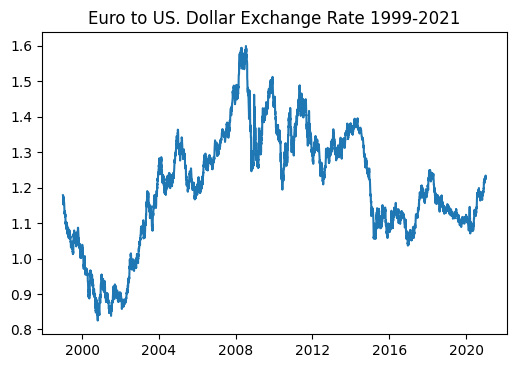

In [11]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.title('Euro to US. Dollar Exchange Rate 1999-2021')
plt.show()

We can see many small wiggles, meaning there are daily variation in the exchange rate. If we want to show the long term trends, we will need to use rolling mean (also known as moving average).

### Rolling Mean
Let's graph a line plot between `Time` and `US_dollar` using the rolling mean in the 30-days window, so it smoothes out the graph.

In [12]:
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()

# Display from the 25th row to see if the calculation gone through
euro_to_dollar.iloc[25:35,:]

,Time,US_dollar,rolling_mean_30
25,1999-02-08,1.1246,NaN
26,1999-02-09,1.1333,NaN
27,1999-02-10,1.1342,NaN
28,1999-02-11,1.1312,NaN
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830
31,1999-02-16,1.1176,1.146783
32,1999-02-17,1.1253,1.145150
33,1999-02-18,1.1232,1.143817
34,1999-02-19,1.1163,1.142163


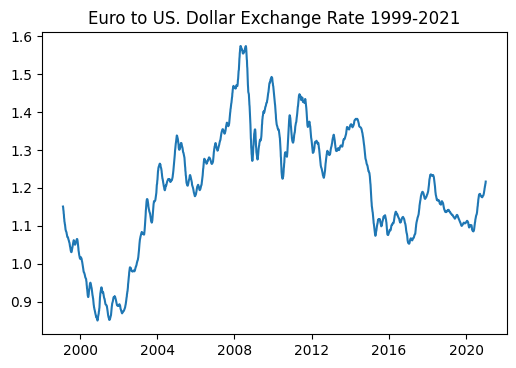

In [13]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean_30'])
plt.title('Euro to US. Dollar Exchange Rate 1999-2021')
plt.show()

Let's graph `rolling_mean` column with `Time` to see what we get.

### Coming up with an Idea
The graph illustrates the monthly variation between the Euro and US. dollar, there are many stories and factors, arguably, which can come in and have relative strong impacts on the exchange rates. I am rather going to illustrate the story in a timeline and mark the events that happened in that period 

#### Three major economic events happen in US economy from 1999-2020:
- `2000-2003`: [years of developed countries' economic downturn](https://en.wikipedia.org/wiki/Early_2000s_recession#References), heavily affected European Union's economy in the early 2000 and the US's economy in 2001 

- `2007-2009`: there happened a devastating economic recession in the US economy - the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession#Effects_on_Europe), affecting most of developed countries, which in turn pressured on the FED to [lower interest rates](https://fred.stlouisfed.org/series/FEDFUNDS) considerably, to stimulate the economy, essentially weakened the US dollar. 

- `2020-2021`: [COVID 19](https://en.wikipedia.org/wiki/COVID-19) hits the US hard, causing cities and states go to total lockdown and discrupting the global economy and a shock in supply chain accorss the world. 

- We will show how the Euro - US dollar exchange rate changed during 3 US presidency - George W. Bush (2001-2009), Barrack Obama (2009-2017), Donald J. Trump (2017-2021)

### Coding the Graph

Now that the idea of a data visualization story is formed, I'll start coding.

In [14]:
# Create a 2000-2003 Financial Crisis variable
fin_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2000) & (euro_to_dollar['Time'].dt.year <= 2003)]

# Create a Great Recession variable
recession = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2009)]

# Create a Covid Pandemic variable
covid = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year <= 2021)]

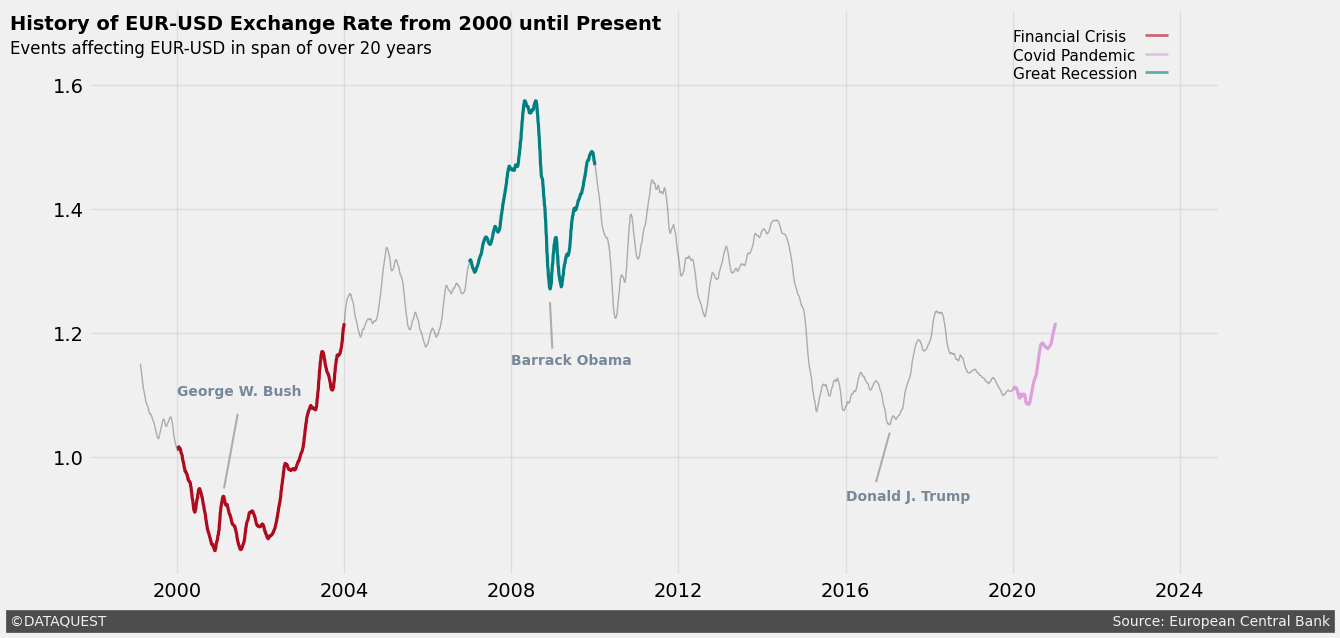

In [26]:
plt.style.use('fivethirtyeight')

# Add the plot
fig, ax = plt.subplots(figsize = (13,7))
ax.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean_30'],
        linewidth = 1, color = '#0f0f0f',
        alpha = 0.3
        )

# Highlight the 3 major financial events since 2000:

dataset_list = [fin_crisis, recession, covid]
color = ['#af0b1e', 'teal', 'plum']
for data, co in zip(dataset_list, color):
    ax.plot(data['Time'], data['rolling_mean_30'], 
            linewidth = 2.3, color = co)

    
# Add legend to mark each event unique

x1 = [ax.get_xticks()[7] - 100, ax.get_xticks()[7] - 300]
y = [[1.62, 1.62],[1.65, 1.65],[1.68, 1.68]]
colors = ['teal', 'plum', '#af0b1e']
for y1, co in zip(y, colors):
    plt.plot(x1,y1, color = co, linewidth = 2, alpha = 0.6)

legend_y = [1.64, 1.67, 1.61]
legend_name = ['Covid Pandemic', 'Financial Crisis', 'Great Recession']
for name, y in zip(legend_name, legend_y):
    ax.text(ax.get_xticks()[6], y, name, fontsize = 11)

    
# Add the name of present according to the year they inaugurated:

x2 = [[730530, 730650], [733380, 733400], [736230, 736350]]
y2 = [[0.95, 1.07], [1.25, 1.175], [0.96, 1.04]]
for x2, y2 in zip(x2, y2):
    plt.plot(x2, y2, color = 'grey', linewidth = 1.5, alpha = 0.6)
pres_x = [ax.get_xticks()[1], ax.get_xticks()[3] , ax.get_xticks()[5]]
pres_y = [1.1, 1.15, 0.93]
name = ['George W. Bush', 'Barrack Obama', 'Donald J. Trump']
for pres, x, y in zip(name, pres_x, pres_y):
    ax.text(x, y, pres, weight = 'bold', color = 'lightslategray', fontsize = 10)


# Add a title and a subtitle    
ax.text(ax.get_xticks()[0], 1.69, "History of EUR-USD Exchange Rate from 2000 until Present",
        weight='bold')
ax.text(ax.get_xticks()[0], 1.65, 'Events affecting EUR-USD in span of over 20 years',
        size=12)

# Add signature
ax.text(ax.get_xticks()[0], 0.73, '©DATAQUEST' + ' '*230 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

        
# Add transparency to the grid
ax.grid(alpha=0.5)

plt.show()